# Grafer og at plotte

In [1]:
try:
    import fysisk_biokemi
    print("Already installed")
except ImportError:
    %pip install -q "fysisk_biokemi[colab] @ git+https://github.com/au-mbg/fysisk-biokemi.git"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Vi så sidste gang på funktioner og på arrays. Begge dele er meget
relevante i forhold til dagens emne: at lave grafer også kaldt at
**plotte**.

### Opgave 1

Sidst gang regnede vi volumen af celler givet radius, vi gjorde dette
ved at skrive en funktion til at lave beregningen. Nu vil vi gøre det
omvendte, regne radius givet en volume - der er formlen

$$
r(V) = \sqrt[3]{\frac{3}{4\pi} V}
$$

Implementer en funktion der kan beregne denne formel, husk at
potens-funktioner $x^k$ kan regnes med `x**k` og kubiske rod er en
potens funktion med $k=1/3$.

In [4]:
def radius(volume):
    return (3/4 * volume / np.pi)**(1/3)

Brug din funktion til at regne radius af dette array

In [5]:
volumner = np.array([30, 45, 60, 100, 98784 * np.pi])

Lav beregningen i cellen herunder,

In [7]:
radii = radius(volumner)
print(radii)

[ 1.92757321  2.20652051  2.42859006  2.87941191 42.        ]

## Plotte med `matplotlib`

Der er mange måder at plotte på, her vil vi bruge `matplotlib`.

Vi kan lave et plot af en lige linje mellem to punkter $(x_1, y_1)$ og
$(x_2, y_2)$, sådam her

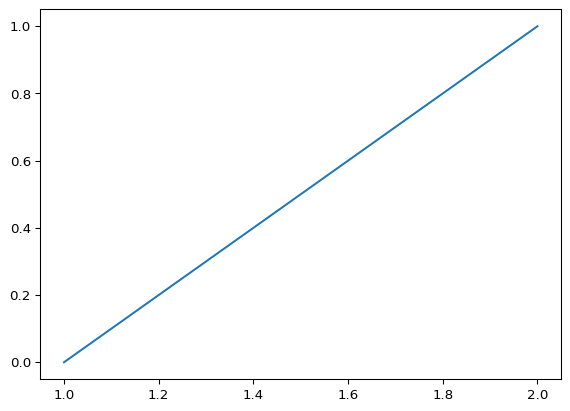

In [8]:
x = np.array([1, 2])
y = np.array([0, 1])
fig, ax = plt.subplots()
ax.plot(x, y)

> **Note**
>
> `ax` er en speciel type, her kan du tænke på den som den boks der
> indeholder plottet.

Hvis vi så vil forbinde det andet punkt med et tredje punkt $(x_3, y_3)$
skal vi istedet

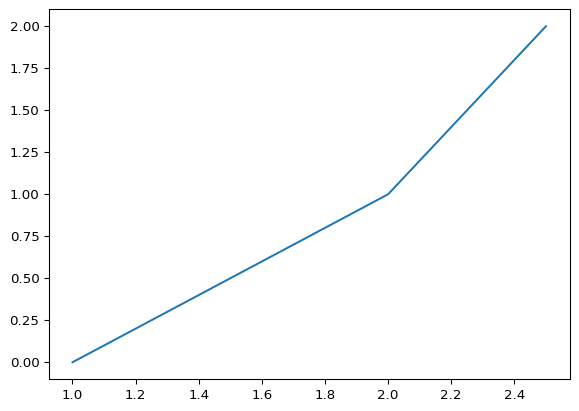

In [9]:
x = np.array([1, 2, 2.5])
y = np.array([0, 1, 2])
fig, ax = plt.subplots()
ax.plot(x, y)

### Opgave 2

Lav en figur med et linje plot mellem disse fem punkter

-   $P_1 = (0, 0)$
-   $P_2 = (1, 0)$
-   $P_3 = (1, 1)$
-   $P_4 = (0, 1)$
-   $P_5 = (0, 0)$

Start med at definere et array for både `x` og `y`

In [11]:
x = np.array([0, 1, 1, 0, 0])
y = np.array([0, 0, 1, 1, 0])

Brug nu `plt.plot` til at plotte figuren.

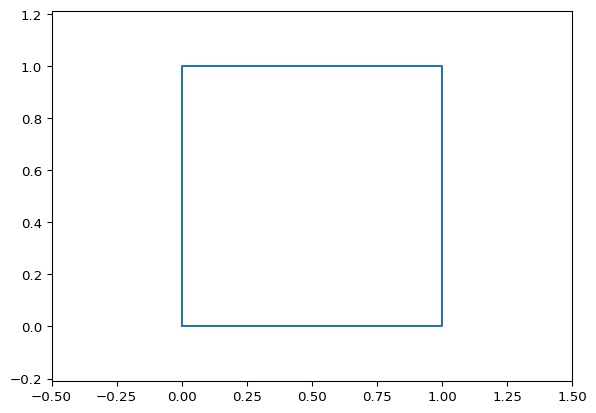

In [13]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.axis('equal')
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])

### Opgave 3

Når vi har en funktion er det ofte en god ide at plotte den, så vi kan
opbygge intuition om hvordan forskellige funktioner opfører sig.

Udover de ting vi har set indtil videre kan NumPy også bruges til at
lave arrays på forskellige måder, f.eks. et array med tal mellem to
endepunkter;

In [14]:
volumner = np.linspace(0, 50, 100) # (start, slut, antal punkter)

Brug dette array til at lave et plot af funktionen `radius`. Start med
at beregne radius for alle værdier i `volumener`

In [16]:
radii = radius(volumner)

Lav derefter et plot med `volumner` som x-akse og `radii` som y-akse

Text(0, 0.5, 'Volumen')

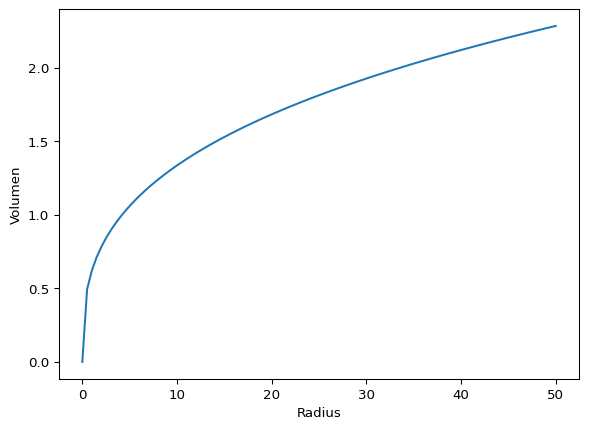

In [18]:
fig, ax = plt.subplots()
ax.plot(volumner, radii)
ax.set_xlabel('Radius')
ax.set_ylabel('Volumen')

### Opgave 4

Vi har tidligere set på adsorptions spektrummet af chlorophyll, det
vender vi tilbage til nu.

In [19]:
from fysisk_biokemi import load_dataset

df = load_dataset("chlorophyll")
print(df)

bølgelængder = df['Wavelength(nm)'] # Et array med 501 indgange
adsorption = df['AdsorptionCoefficient'] # Et array med 501 indgange

     Wavelength(nm)  AdsorptionCoefficient
0               300              20487.000
1               301              20547.000
2               302              20642.000
3               303              20767.000
4               304              20899.000
..              ...                    ...
496             796                 26.665
497             797                 15.556
498             798                 29.164
499             799                 21.473
500             800                 18.396

[501 rows x 2 columns]

Lav et plot med `bølgelængder` som x-akse og `adsorption` som y-akse.

Text(0, 0.5, 'Adsorptions koefficient')

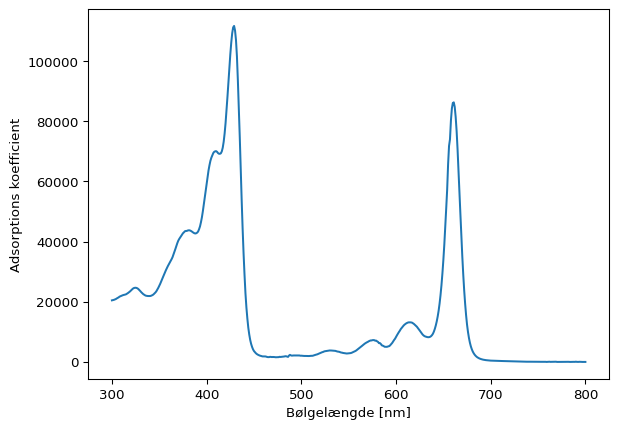

In [21]:
fig, ax = plt.subplots()
ax.plot(bølgelængder, adsorption)
ax.set_xlabel('Bølgelængde [nm]')
ax.set_ylabel('Adsorptions koefficient')

Nogle gange er vi ikke interesseret i hele et datasæt og vil hellere se
detaljerne i en region af datasættet. Heldigvis har vi tidligere lært om
indexing, husk f.eks. at vi kan trække det femte tal af et array ud
sådan her;

In [22]:
mit_array = [0, 2, 4, 6, 8, 10, 12, 14]
print(mit_array[4])

8

> **Note**
>
> Husk at i Python tæller vi fra 0, så det første tal er i indgang 0 og
> det femte tal er i indgang 4.

Der er flere måder at indexere på, f.eks. kan vi trække alle tal mellem
indgang 0 (inklusiv) og indgang 4 (eksklusiv) ud sådan her

In [23]:
print(mit_array[0:4])

[0, 2, 4, 6]

Brug dette til at lave et plot af vores chlorophyll datasæt, men kun
imellem indgang 0 og indgang 200 på hver akse.

Text(0, 0.5, 'Adsorption')

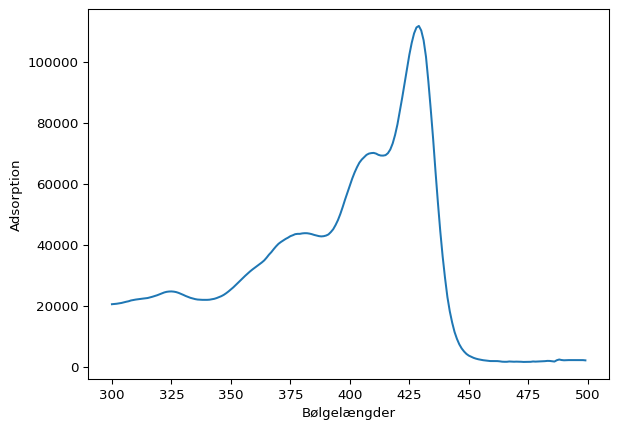

In [25]:
fig, ax = plt.subplots()
ax.plot(bølgelængder[0:200], adsorption[0:200])
ax.set_xlabel('Bølgelængder')
ax.set_ylabel('Adsorption')